# Affaan's Bitcoin Price Predictor Using Holt's Linear Exponential Smoothing for Time-Series

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [70]:
# Read 5 Year Price/Time Daily Increment Data for Bitcoin into a DataFrame
bitcoin = pd.read_csv('BTC5Y.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'], infer_datetime_format=True)
bitcoin.set_index('Date', inplace=True)
bitcoin_series = bitcoin['Close']

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sta

Cross-validation RMSE scores: [6548.812371678995, 4065.6099458188, 5851.283752896168, 34421.94558315902, 11321.747237641277]
Average RMSE score: 12441.879778238852


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Mean Absolute Percentage Error: 64.00789993458602


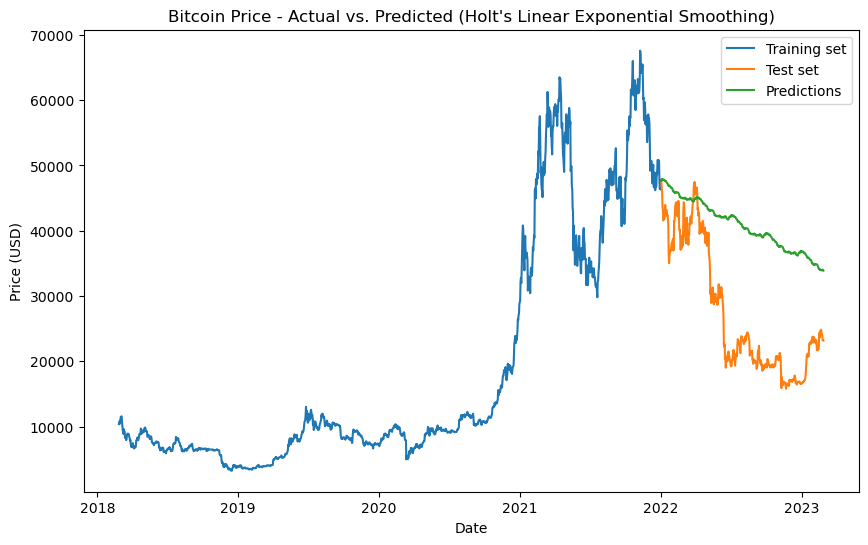

In [71]:
# Train/test split
split_date = pd.to_datetime('2022-01-01')
train = bitcoin_series.loc[bitcoin_series.index <= split_date]
test = bitcoin_series.loc[bitcoin_series.index > split_date]

# Set the seasonal period to 90
seasonal_period = 90

# Initialize model parameters
smoothing_level = 0.2
smoothing_slope = 0.05

# Set up cross-validation using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Fit model and make predictions using cross-validation
rmse_scores = []
for train_index, test_index in tscv.split(train):
    # Train/validation split for cross-validation
    cv_train, cv_val = train.iloc[train_index], train.iloc[test_index]

    # Fit model to training data
    model = ExponentialSmoothing(cv_train, trend='add', seasonal='add', seasonal_periods=seasonal_period)
    fitted_model = model.fit(optimized=True)

    # Make predictions on validation data
    preds = fitted_model.forecast(len(cv_val))

    # Calculate RMSE for validation period
    rmse = np.sqrt(mean_squared_error(cv_val, preds))
    rmse_scores.append(rmse)

# Print average RMSE score
print('Cross-validation RMSE scores:', rmse_scores)
print('Average RMSE score:', np.mean(rmse_scores))

# Fit model to entire training set and make predictions on test set
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=seasonal_period)
fitted_model = model.fit(optimized=True)
preds = fitted_model.forecast(len(test))

# Compute the mean absolute percentage error
mape = np.mean(np.abs((test - preds) / test)) * 100

# Print the mean absolute percentage error
print('Mean Absolute Percentage Error:', mape)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training set')
plt.plot(test.index, test, label='Test set')
plt.plot(preds.index, preds, label='Predictions')
plt.legend()
plt.title('Bitcoin Price - Actual vs. Predicted (Holt\'s Linear Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()
